In [7]:
%matplotlib inline 
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt
import matplotlib as mpl
import math

In [8]:
#set default marker sizes, line widths etc
mpl.rcParams['lines.linewidth']=2.2*3.0
mpl.rcParams['lines.markersize']=2.2*10.0
mpl.rcParams['lines.markeredgewidth']=2.2*1.0
mpl.rcParams['xtick.labelsize']=2.2*20
mpl.rcParams['ytick.labelsize']=2.2*20
mpl.rcParams['axes.labelsize']=2.2*20
mpl.rcParams['font.size']=1.1*22

In [9]:
#Showing up all the number of copolymer for makes the plots very messy. 
#Therefore, only some concentration of copolymers(numCp)for all 4 
#configuration of parameters numlipids = 260,270 and copolymer length=7,11. 
numCp_Lip260_Cpl7=[0,10,20,30,40]
numCp_Lip260_Cpl11=[0,10,20,30,40]
numCp_Lip270_Cpl7=[0,50,90,100,120]
numCp_Lip270_Cpl11=[0,30,70,100,110]

#store them in one array together
numCp_array=[numCp_Lip260_Cpl7,numCp_Lip260_Cpl11,numCp_Lip270_Cpl7,numCp_Lip270_Cpl11]

#The default color array.
colorCodeArray=['k','r','b','y','m','c','w','g','w','navy','lightgreen','tomato','darkslategrey']

#The filename for the stored data in files.
filePathName=['260/7','260/11','270/7','270/11']

In [10]:
#Define the function for free energy, it was found that
#it was that defining the function in the form of area per 
#lipid per frame has less error.

#Area of frame set by the periodic box
area_Frame=4096

def freeEnergy(area_Pore,A_f,gamma_const,K,c,lineTension):
    area_Pore_red=area_Pore/area_Frame
    return  gamma_const*(1-area_Pore_red)-K*np.log(1-A_f*(1-area_Pore_red)**(-1))+lineTension*sqrt(area_Pore_red)+c

In [11]:
#There are some parameter bound for free energy function which
#are calculated by fitting the free energy function in numCp=0,
#and all the other numCP needs to fit accordingly.
#Here, they are stored in tuples.

bounds_Lip260_Cpl7=([0.6799,215.99,49.99,-273.11,0],[0.68,216,50,-273,10000])
bounds_Lip260_Cpl11=([0.6799,215.99,49.99,-273.22,0],[0.68,216,50,-273,10000])
bounds_Lip270_Cpl7=([0.68,190,49.99,-247.15,0],[0.6811,190.001,50,-247.1499,10000])
bounds_Lip270_Cpl11=([0.67,190,49.99,-250,0],[0.68,190.001,50,-210.7,10000])

#store them in one array together
bounds_array=[bounds_Lip260_Cpl7,bounds_Lip260_Cpl11,bounds_Lip270_Cpl7,bounds_Lip270_Cpl11]

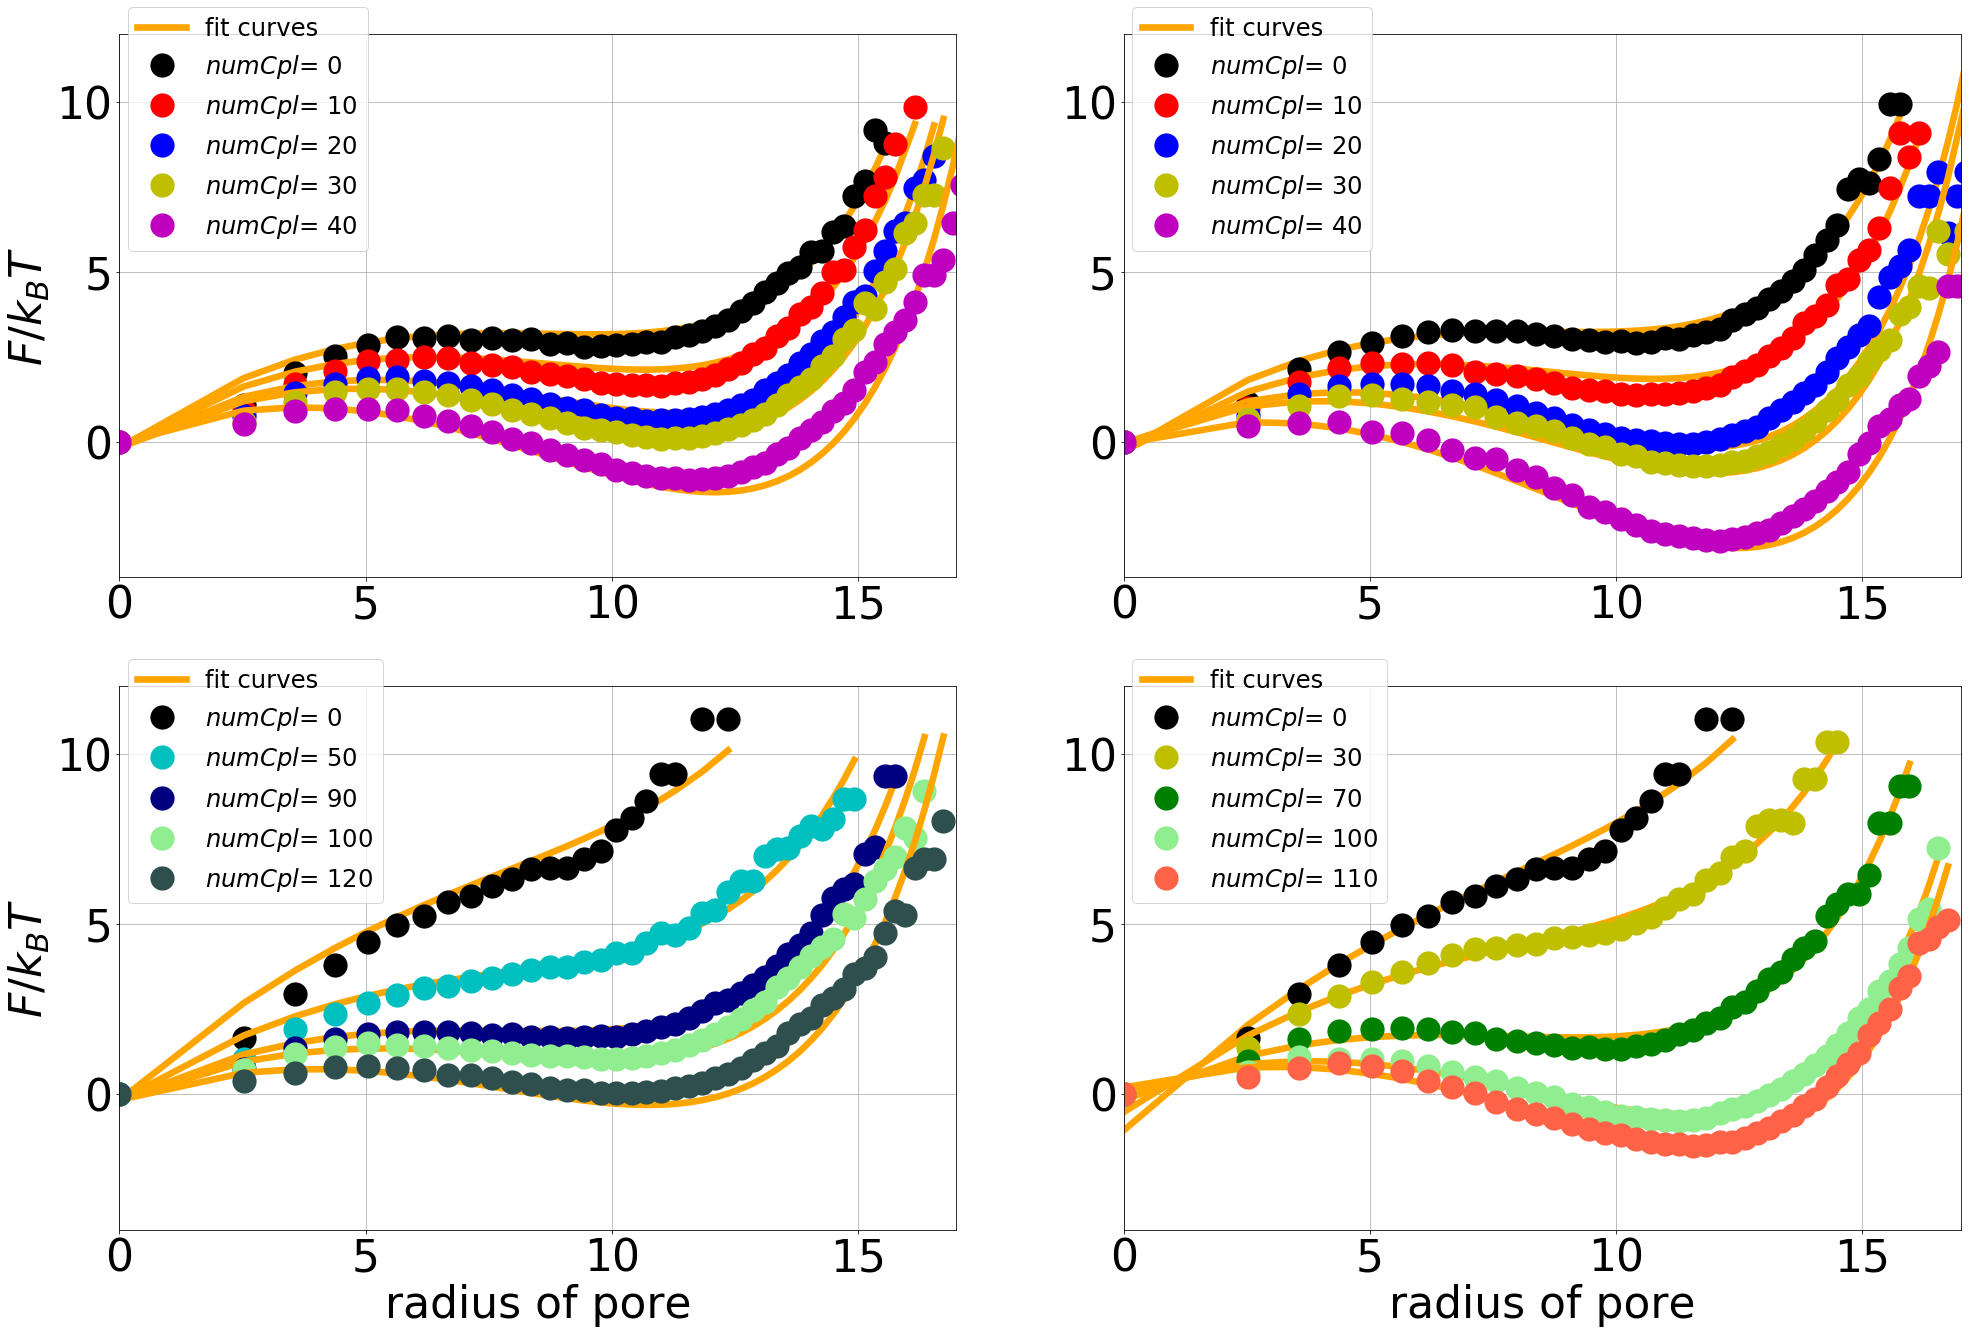

In [12]:
#set default labels and subplots
fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(15*2.2,10*2.2))

#set default x and y limits.
for ax in fig.axes:
    ax.set_xlim([0,17])
    ax.set_ylim([-4,12])
    ax.grid()
    


#radius of pore.
for ax in axes[1,:]:
    ax.set_xlabel("radius of pore")

#free energy per k_BT.    
for ax in axes[:,0]:
    ax.set_ylabel("$F/k_BT$")
    
#Unrolling axes helps plotting in a single for loop.
axes_unrolled=axes.reshape(1,4)[0]


#First run loop around set of number of copolymer setup for specific
#number of lipids, and number of copolymers.
for index,numCpset in enumerate(numCp_array):
    #Then loop over numCp from this set.
    for numCp in numCpset:
        data=np.loadtxt(filePathName[index]+"/Npoly"+str(numCp)+".dat")
        area_Pore=data[:,0]
        y=data[:,2]
        y=-np.log(y)
        y=y-y[0]
        
        #non linear regression analyis
        best_fits,_= curve_fit(freeEnergy, area_Pore, y, bounds=bounds_array[index])
        
        #This step is just performed for just labels for fitted data
        if numCp>0:
            axes_unrolled[index].plot(sqrt(area_Pore/math.pi),freeEnergy(area_Pore,best_fits[0]
                                            ,best_fits[1],best_fits[2],best_fits[3],best_fits[4]),'orange')
        else:
            axes_unrolled[index].plot(sqrt(area_Pore/math.pi),freeEnergy(area_Pore,best_fits[0],
                             best_fits[1],best_fits[2],best_fits[3],best_fits[4]),'orange',label='fit curves')
        
        #Also plot the original data with the fitted data.
        axes_unrolled[index].plot(sqrt(area_Pore/math.pi),y,str(colorCodeArray[int(numCp/10)]),
                                  marker="o",linestyle='',label='$numCpl$= '+str(numCp))
    #Plot the labels.
    axes_unrolled[index].legend(bbox_to_anchor=(0.01, 1.05), loc=2, borderaxespad=0.)